Given a `matrix` and a `target`, return the number of non-empty submatrices that sum to target.

A submatrix `x1, y1, x2, y2` is the set of all cells `matrix[x][y]` with `x1 <= x <= x2` and `y1 <= y <= y2`.

Two submatrices `(x1, y1, x2, y2)` and `(x1', y1', x2', y2')` are different if they have some coordinate that is different: for example, if `x1 != x1'`.

<br> 

**Example 1:**

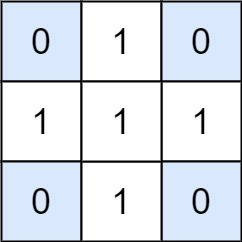

>**Input:** matrix = [[0,1,0],[1,1,1],[0,1,0]], target = 0<br>
>**Output:** 4<br>
>**Explanation:** The four 1x1 submatrices that only contain 0.


**Example 2:**
>**Input:** matrix = [[1,-1],[-1,1]], target = 0<br>
>**Output:** 5<br>
>**Explanation:** The two 1x2 submatrices, plus the two 2x1 submatrices, plus the 2x2 submatrix.


**Example 3:**
>**Input:** matrix = [[904]], target = 0<br>
>**Output:** 0

<br>

**Constraints:**
- >1 <= matrix.length <= 100
- >1 <= matrix[0].length <= 100
- >-1000 <= matrix[i] <= 1000
- >-10^8 <= target <= 10^8

In [1]:
class Solution:
    def numSubmatrixSumTarget(self, matrix: list[list[int]], target: int) -> int:
        m, n = len(matrix), len(matrix[0])
        count = 0

        for i in range(m):
            for j in range(1, n):
                matrix[i][j] += matrix[i][j - 1]

        for i in range(n):
            for j in range(i, n):
                prefix_sum = {0: 1}
                current_sum = 0

                for k in range(m):
                    current_sum += matrix[k][j] - (matrix[k][i - 1] if i > 0 else 0)
                    count += prefix_sum.get(current_sum - target, 0)

                    prefix_sum[current_sum] = prefix_sum.get(current_sum, 0) + 1
        
        return count